In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
file_path = 'Data/cleaned_population_data.csv'
data = pd.read_csv(file_path)
print("All columns: %s" % (("|").join(list(data.columns))))
not_relevant = ["Country or Area", "Year(s)", "SDG Region", "Land area (sq. km)", "GDP per capita (USD)"]

All columns: Country or Area|Year(s)|Population(thousands)|Old-age (65+) dependency ratio|Child (<15) dependency ratio|Land area (sq. km)|GDP per capita (USD)|Infant Mortality per 1000 live births|Life Expectancy|SDG Region|BMI_Both|BMI_Male|BMI_Female


Find outliers


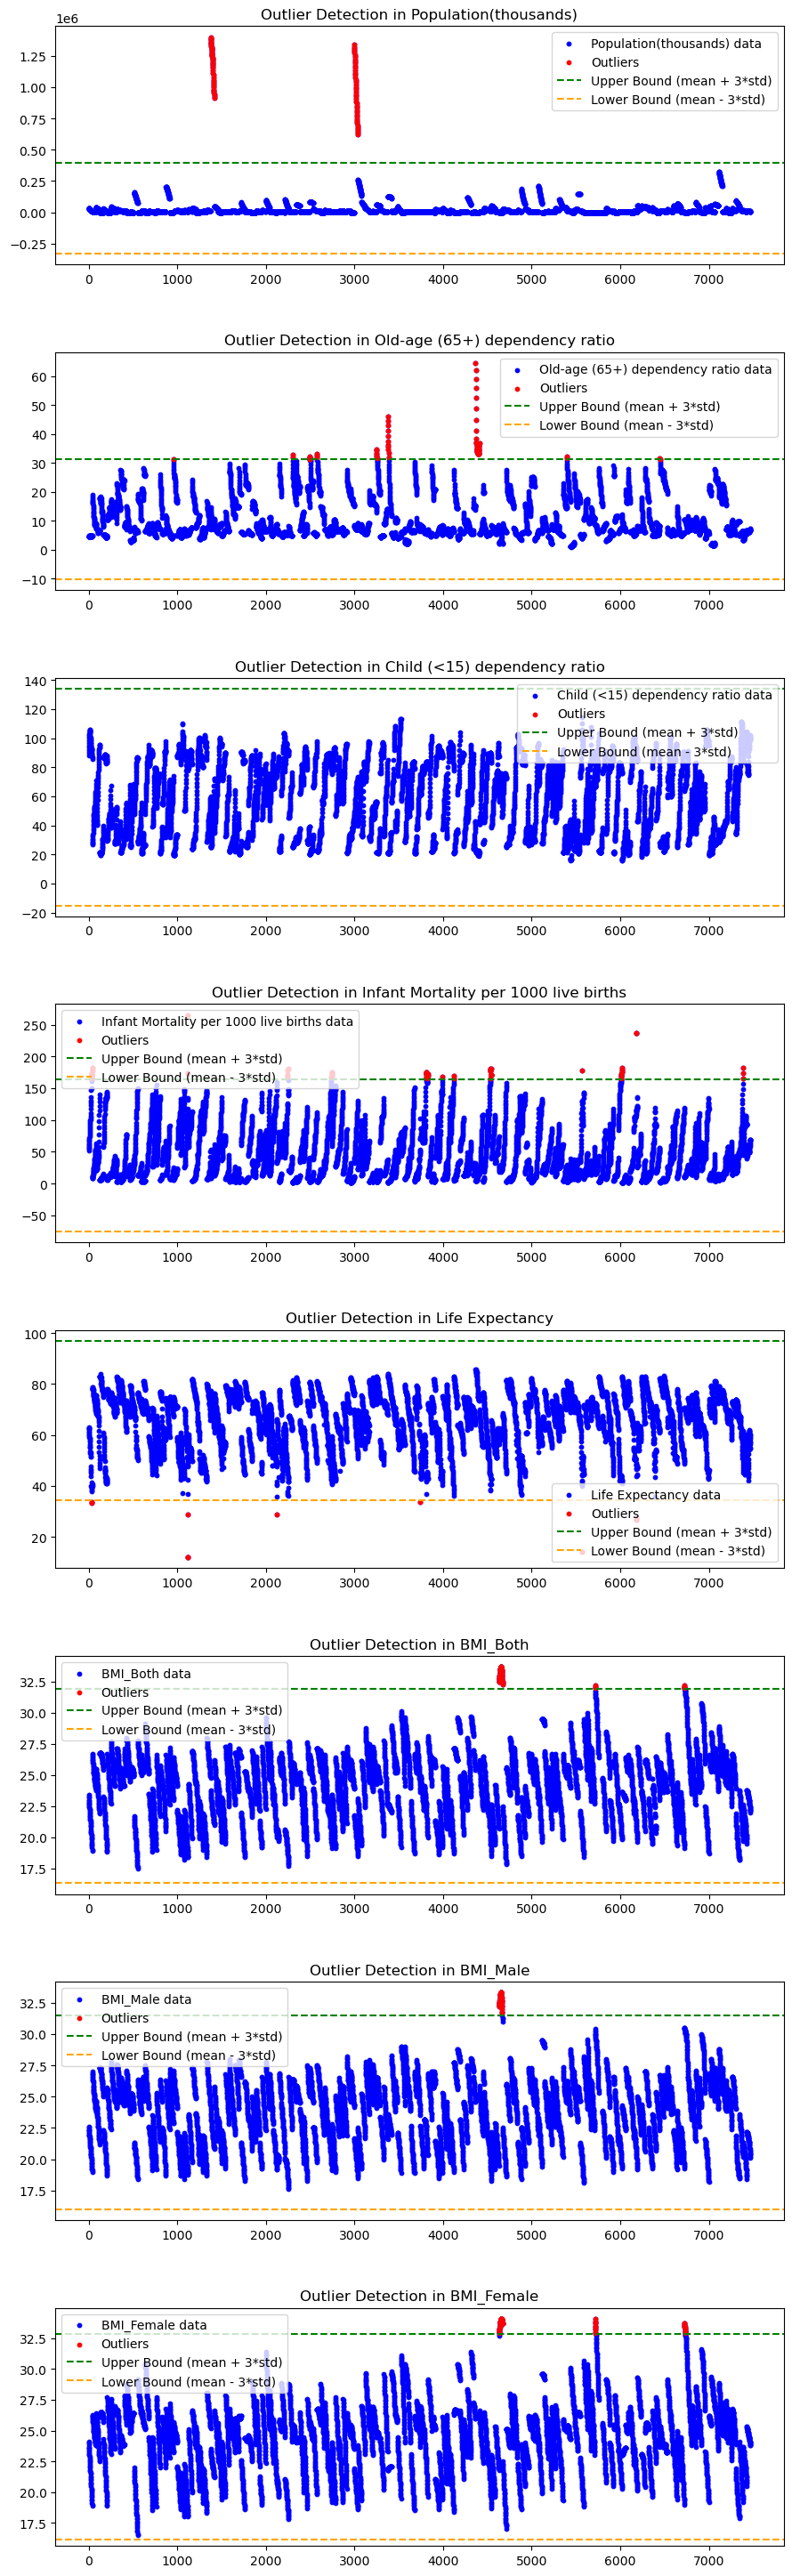

In [2]:
# Define a function to detect outliers using mean and standard deviation
def detect_outliers_by_mean(data, column, threshold=3):
    mean = data[column].mean()
    std_dev = data[column].std()
    # Define the upper and lower bounds for outliers
    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev
    # Detect outliers
    outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)]
    return outliers, upper_bound, lower_bound

columns = list(data.columns)
for i in not_relevant:
    columns.remove(i)
# Detect outliers in each column and visualize results
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 30))
fig.tight_layout(pad=5.0)
for i, column in enumerate(columns):
    outliers, upper_bound, lower_bound = detect_outliers_by_mean(data, column)
    axes[i].scatter(data.index, data[column], color='blue', label=f'{column} data', s=10)
    axes[i].scatter(outliers.index, outliers[column], color='red', label='Outliers', s=10)
    axes[i].axhline(y=upper_bound, color='green', linestyle='--', label=f'Upper Bound (mean + 3*std)')
    axes[i].axhline(y=lower_bound, color='orange', linestyle='--', label=f'Lower Bound (mean - 3*std)')
    axes[i].set_title(f'Outlier Detection in {column}')
    axes[i].legend()
plt.show()

Mean Life Expectancy

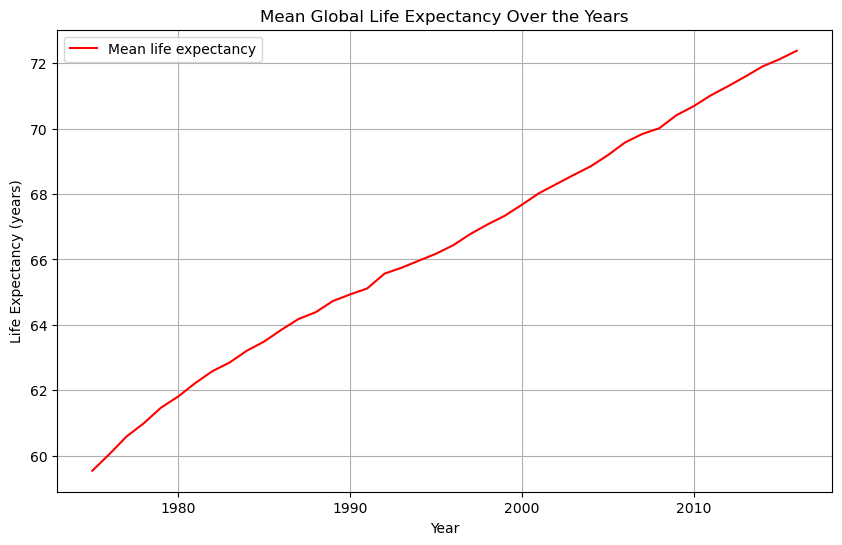

In [3]:
data['Weighted Life Expectancy'] = data['Life Expectancy'] * data['Population(thousands)']

# Group by year, sum the weighted life expectancy and total population
yearly_data = data.groupby('Year(s)').agg(
    total_weighted_life_expectancy=('Weighted Life Expectancy', 'sum'),
    total_population=('Population(thousands)', 'sum')
)
yearly_data['Global Life Expectancy'] = yearly_data['total_weighted_life_expectancy'] / yearly_data['total_population']

plt.figure(figsize=(10,6))
plt.plot(yearly_data.index, yearly_data['Global Life Expectancy'], color = "r", label = "Mean life expectancy")
plt.title('Mean Global Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.legend()

plt.show()

Create an interactive choropleth map using Plotly Express

In [4]:
fig = px.choropleth(
    data.sort_values(by='Year(s)', ascending = True), 
    locations="Country or Area", 
    locationmode="country names",
    color="Life Expectancy", 
    hover_name="Country or Area", 
    animation_frame="Year(s)",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Life Expectancy by Country over the years",
    labels={'Life Expectancy': 'Life Expectancy (years)'},
    range_color=(data['Life Expectancy'].min(), data['Life Expectancy'].max()),

)

fig.update_layout(
    width=1400,
    height=900,
    title_font_size=24,
    
    
)
fig.show()

Mean life expectancy in each SGD region over years


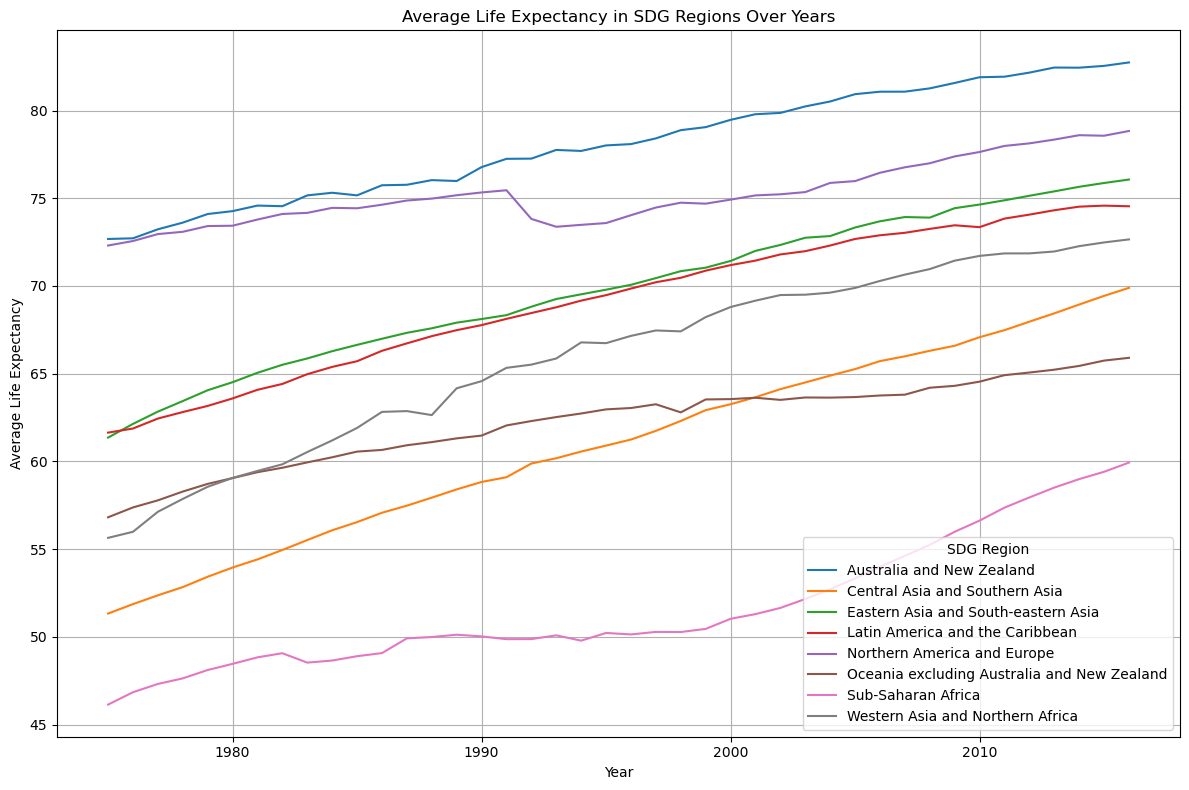

In [6]:
data['Weighted_Life_Expectancy'] = data['Life Expectancy'] * data['Population(thousands)']
avg_life_expectancy = data.groupby(['SDG Region', 'Year(s)']).apply(
    lambda x: x['Weighted_Life_Expectancy'].sum() / x['Population(thousands)'].sum()
).reset_index(name='Average_Life_Expectancy')

# Plotting the data
plt.figure(figsize=(12, 8))

for region in avg_life_expectancy['SDG Region'].unique():
    region_data = avg_life_expectancy[avg_life_expectancy['SDG Region'] == region]
    plt.plot(region_data['Year(s)'], region_data['Average_Life_Expectancy'], label=region)

plt.title('Average Life Expectancy in SDG Regions Over Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(loc='best', title='SDG Region')
plt.grid(True)
plt.tight_layout()

plt.show()